In [48]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "/Volumes/HD-PLFU3/AnalysisResult/"

In [49]:
stims = [ ]
for line in file("/Users/tomii/tmp/AnalysisResult/pv_stim.csv"):
    s = line.rstrip('\n').split(',')
    stims.append({
            "sample":s[0], 
            "session" : int(s[1]), 
            "frame_start":int(s[2]),  
            "frame_end": int(s[3]), 
            "core_id" : int(s[4]),
            "roi" : [ int(v) for v in s[5:]]        
        })
for i, s in enumerate(stims): print "{0:0>2}".format(i), " : ", s["sample"], " : ", s["session"] , " : ", s["roi"]

00  :  20140911-2  :  8  :  [0, 128, 60, 128]
01  :  20140911-2  :  14  :  [30, 128, 0, 128]
02  :  20140911-2  :  15  :  [0, 128, 0, 128]
03  :  20140911-2  :  17  :  [0, 128, 0, 128]
04  :  20140911-2  :  34  :  [70, 128, 0, 128]
05  :  20140911-2  :  35  :  [0, 128, 0, 128]
06  :  20140911-2  :  36  :  [0, 128, 0, 128]
07  :  20140911-2  :  38  :  [0, 128, 0, 128]
08  :  20160907-3  :  6  :  [0, 128, 0, 128]
09  :  20160907-3  :  10  :  [0, 128, 0, 128]
10  :  20160907-3  :  11  :  [0, 128, 0, 128]
11  :  20160907-3  :  17  :  [0, 128, 0, 128]
12  :  20160907-3  :  22  :  [0, 128, 0, 128]
13  :  20161019-1  :  18  :  [90, 128, 0, 128]
14  :  20161019-1  :  19  :  [50, 128, 0, 128]
15  :  20161019-2  :  6  :  [0, 128, 0, 128]
16  :  20161019-2  :  7  :  [0, 128, 0, 128]
17  :  20161019-2  :  8  :  [0, 128, 0, 128]
18  :  20161019-2  :  9  :  [0, 128, 0, 128]
19  :  20161019-2  :  10  :  [0, 128, 0, 128]
20  :  20161019-2  :  11  :  [0, 128, 0, 128]
21  :  20161019-2  :  12  :  [0, 12

In [50]:
s = stims[]
print s
frame_start = s["frame_start"]
frame_end = s["frame_end"]
core_id = s["core_id"]
sess_dir = data_dir+"{0}/C001H001S{1:0>4}/".format(s["sample"], s["session"])
print sess_dir

{'roi': [30, 128, 0, 128], 'core_id': 14, 'sample': '20140911-2', 'frame_end': 328, 'session': 14, 'frame_start': 306}
/Volumes/HD-PLFU3/AnalysisResult/20140911-2/C001H001S0014/


306,  14,  26,  91, 
306,  14,  51,  82, 
328,  14,  21,  85, 
328,  14,  36,  75, 


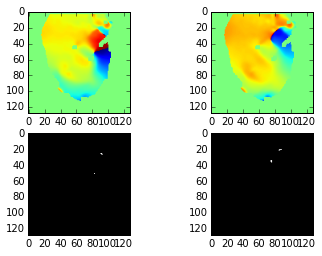

In [51]:
x = np.fromfile(sess_dir+"/core.log", sep=' ')
x = x.reshape(x.shape[0]/4, 4)

d = filter(lambda l:l[0] in [frame_start, frame_end], x)
for l in d: 
    for e in l:
        print "{0:.0f}, ".format(e),
    print
    
core_data = np.load(sess_dir+'/core.npy')
pmap_data = np.load(sess_dir+'/pmap.npy')
plt.subplot('221')
plt.imshow(pmap_data[frame_start])
plt.subplot('222')
plt.imshow(pmap_data[frame_end])
plt.subplot('223')
plt.imshow(core_data[frame_start], cmap='gray')
plt.subplot('224')
plt.imshow(core_data[frame_end], cmap='gray')
plt.show()

306,  14,  26,  91, 
306,  14,  51,  82, 
328,  14,  21,  85, 
328,  14,  36,  75, 


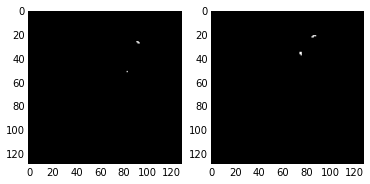

In [52]:
d = filter(lambda l:l[1] == core_id, d)
for l in d: 
    for e in l:
        print "{0:.0f}, ".format(e),
    print
core_data = np.load(sess_dir+'/core.npy')
plt.subplot('121')
plt.imshow((core_data[frame_start]==core_id)*1, cmap='gray')
plt.subplot('122')
plt.imshow((core_data[frame_end] == core_id)*1, cmap='gray')
plt.show()

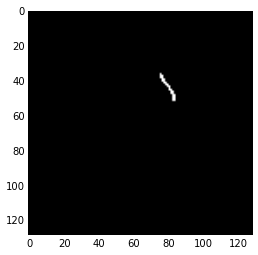

In [53]:
core_traj = (core_data[frame_start:frame_end,:,:] == core_id )*1
core_traj[:,:s["roi"][0],:]= 0
core_traj[:,s["roi"][1]:,:]= 0
core_traj[:,:,:s["roi"][2]]= 0
core_traj[:,:,s["roi"][3]:]= 0
np.save(sess_dir+"core_traj", core_traj)

core_integ = np.sum( core_traj, axis=0)
plt.imshow((core_integ>0), cmap='gray')
plt.savefig(sess_dir+"/core_integ.png")
plt.show()

(30,)
mean 1.67641143382
div 0.818587780802


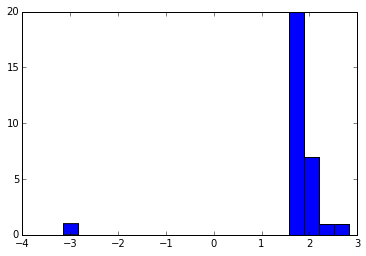

In [54]:
core_index = np.array(np.where(core_integ>0)).T
shift_phase = np.array( [ pmap_data[frame_start, p[0], p[1]] for p in core_index] )
np.save(sess_dir+"/shift_phase", shift_phase)

plt.hist(shift_phase, bins=np.arange(-np.pi, np.pi, np.pi*0.1))
plt.savefig(sess_dir+'shift_phase_hist.png')

print shift_phase.shape
print 'mean', np.mean(shift_phase)
print 'div', np.var(shift_phase)